In [11]:
import pandas as pd
import numpy as np 
data_set= pd.read_csv('/home/boras/Downloads/monatszahlen2112_verkehrsunfaelle.csv')
data_set.columns

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'],
      dtype='object')

In [12]:
## we notice that we need to delete the useless features

In [13]:
infos= data_set.copy()
infos = infos.drop(['VORJAHRESWERT','VERAEND_VORMONAT_PROZENT','VERAEND_VORJAHRESMONAT_PROZENT','ZWOELF_MONATE_MITTELWERT','VORJAHRESWERT'], axis=1)

In [14]:
infos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   1995 non-null   object 
 1   AUSPRAEGUNG  1995 non-null   object 
 2   JAHR         1995 non-null   int64  
 3   MONAT        1995 non-null   object 
 4   WERT         1911 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 78.1+ KB


In [15]:
## we deduce that there is additional rows for features than our label
## + 3 features are categorical and 2 are numerical

In [16]:
## for the numbers
infos.describe()

,JAHR,WERT
count,1995.000000,1911.000000
mean,2010.463158,1440.540031
std,6.326381,4655.514611
min,2000.000000,0.000000
25%,2005.000000,41.000000
50%,2010.000000,399.000000
75%,2016.000000,864.000000
max,2021.000000,46988.000000


In [17]:
#describe as categorical
infos.astype('object').describe()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
count,1995,1995,1995,1995,1911.0
unique,3,3,22,265,930.0
top,Verkehrsunfälle,insgesamt,2010,Summe,21.0
freq,855,855,91,147,21.0


In [19]:
infos[infos['JAHR']==2021]

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2021,202101,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN
...,...,...,...,...,...
1717,Verkehrsunfälle,Verletzte und Getötete,2021,202108,NaN
1718,Verkehrsunfälle,Verletzte und Getötete,2021,202109,NaN
1719,Verkehrsunfälle,Verletzte und Getötete,2021,202110,NaN
1720,Verkehrsunfälle,Verletzte und Getötete,2021,202111,NaN


In [ ]:
## we can deduce that the values of 2021 are the null ones that we should forecast

 ### visualising historically the number of accidents per category 

By year

In [21]:
groupbydf=pd.crosstab( infos['JAHR'],infos['MONATSZAHL'])
groupbydf

MONATSZAHL,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
JAHR,,,
2000,26,26,39
2001,26,26,39
2002,26,26,39
2003,26,26,39
2004,26,26,39
2005,26,26,39
2006,26,26,39
2007,26,26,39
2008,26,26,39


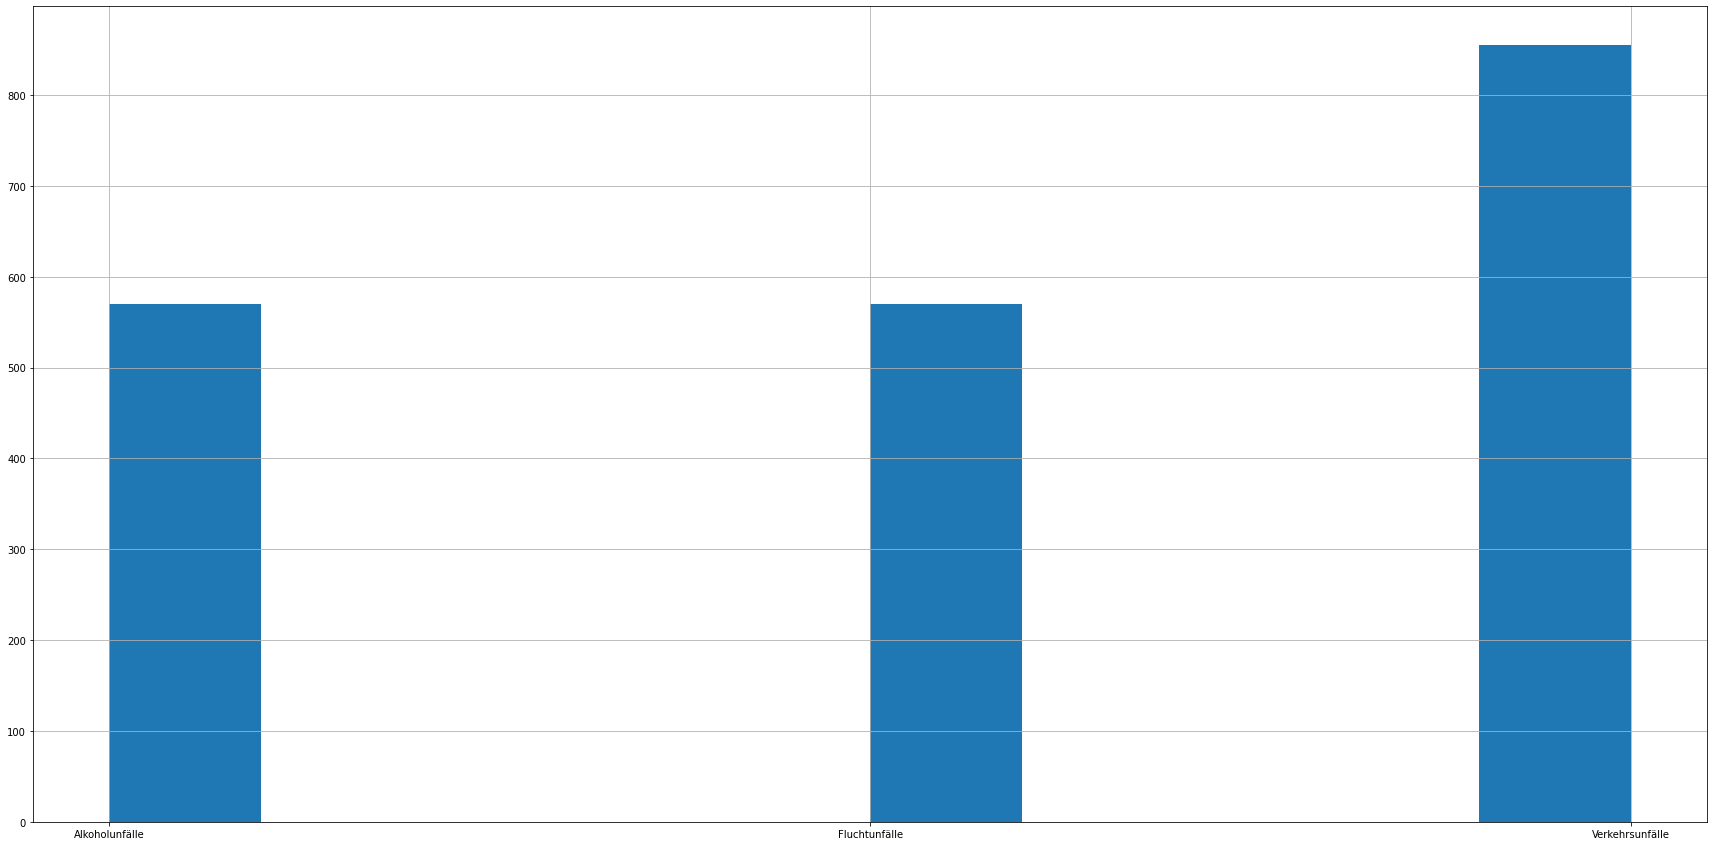

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
infos["MONATSZAHL"].hist(bins=10, figsize=(30,15))
plt.show()

In [23]:
# we can see that both Alcohol accidents and Escape accidents are similar and Traffic accidents are about 300 cases more.
# there is a yearly similarity.

### we are going to make changes dependant on the months now

In [24]:
infos["MONATSZAHL"].explode().unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

In [25]:
infos["AUSPRAEGUNG"].explode().unique()

array(['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'],
      dtype=object)

In [26]:
infos["MONAT"].explode().unique()

array(['202101', '202102', '202103', '202104', '202105', '202106',
       '202107', '202108', '202109', '202110', '202111', '202112',
       'Summe', '202001', '202002', '202003', '202004', '202005',
       '202006', '202007', '202008', '202009', '202010', '202011',
       '202012', '201901', '201902', '201903', '201904', '201905',
       '201906', '201907', '201908', '201909', '201910', '201911',
       '201912', '201801', '201802', '201803', '201804', '201805',
       '201806', '201807', '201808', '201809', '201810', '201811',
       '201812', '201701', '201702', '201703', '201704', '201705',
       '201706', '201707', '201708', '201709', '201710', '201711',
       '201712', '201601', '201602', '201603', '201604', '201605',
       '201606', '201607', '201608', '201609', '201610', '201611',
       '201612', '201501', '201502', '201503', '201504', '201505',
       '201506', '201507', '201508', '201509', '201510', '201511',
       '201512', '201401', '201402', '201403', '201404', '20140

In [ ]:
# 3 values for category and type